In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [30]:
#pip install googlefinance

In [31]:
import yfinance as yf

def scrape_stock_data(ticker, start_date, end_date):
    # Scrape data from Yahoo Finance
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

if __name__ == "__main__":
    ticker = 'AAPL'
    start_date = '2014-01-01'
    end_date = '2024-01-01'

    df = scrape_stock_data(ticker, start_date, end_date)
    print(df.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-01-02  19.845715  19.893929  19.715000  19.754642  17.296659  234684800
2014-01-03  19.745001  19.775000  19.301071  19.320715  16.916721  392467600
2014-01-06  19.194643  19.528570  19.057142  19.426071  17.008970  412610800
2014-01-07  19.440001  19.498571  19.211430  19.287144  16.887327  317209200
2014-01-08  19.243214  19.484285  19.238930  19.409286  16.994274  258529600


In [32]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [33]:
df=df.reset_index()
print(df.head())

        Date       Open       High        Low      Close  Adj Close     Volume
0 2014-01-02  19.845715  19.893929  19.715000  19.754642  17.296659  234684800
1 2014-01-03  19.745001  19.775000  19.301071  19.320715  16.916721  392467600
2 2014-01-06  19.194643  19.528570  19.057142  19.426071  17.008970  412610800
3 2014-01-07  19.440001  19.498571  19.211430  19.287144  16.887327  317209200
4 2014-01-08  19.243214  19.484285  19.238930  19.409286  16.994274  258529600


In [34]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600


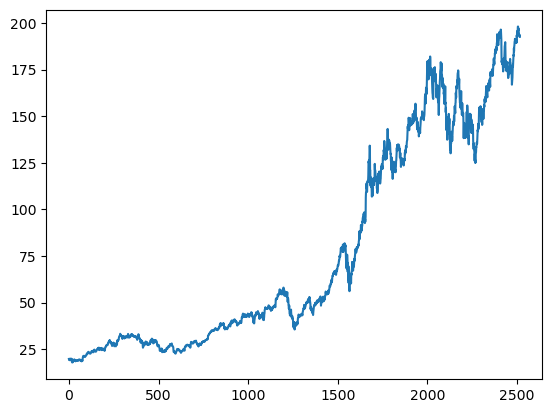

In [35]:
plt.plot(df.Close)

In [36]:
df

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600
...,...,...,...,...,...
2511,195.179993,195.410004,192.970001,193.600006,37122800
2512,193.610001,193.889999,192.830002,193.050003,28919300
2513,192.490005,193.500000,191.089996,193.149994,48087700
2514,194.139999,194.660004,193.169998,193.580002,34049900


In [37]:
m100 = df.Close.rolling(100).mean()
print(m100)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    181.768301
2512    181.787101
2513    181.898701
2514    182.046001
2515    182.173301
Name: Close, Length: 2516, dtype: float64


In [38]:
m200=df.Close.rolling(200).mean()
m200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    178.649100
2512    178.871851
2513    179.085250
2514    179.290201
2515    179.487900
Name: Close, Length: 2516, dtype: float64

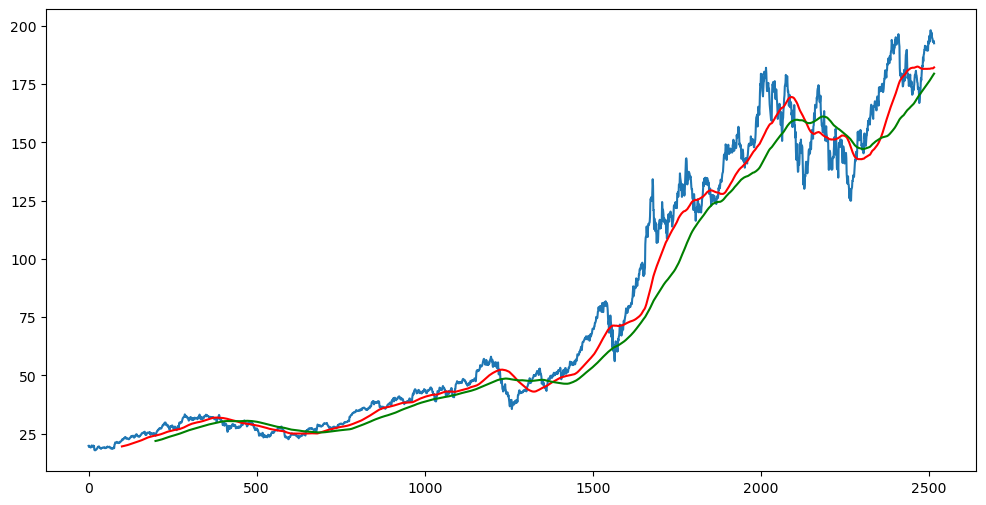

In [39]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(m100,'r')
plt.plot(m200,'g')

In [40]:
df.shape

(2516, 5)

In [41]:
x=df.drop('Close',axis=1)
x

,Open,High,Low,Volume
0,19.845715,19.893929,19.715000,234684800
1,19.745001,19.775000,19.301071,392467600
2,19.194643,19.528570,19.057142,412610800
3,19.440001,19.498571,19.211430,317209200
4,19.243214,19.484285,19.238930,258529600
...,...,...,...,...
2511,195.179993,195.410004,192.970001,37122800
2512,193.610001,193.889999,192.830002,28919300
2513,192.490005,193.500000,191.089996,48087700
2514,194.139999,194.660004,193.169998,34049900


In [42]:
y=df['Close']
y

0        19.754642
1        19.320715
2        19.426071
3        19.287144
4        19.409286
           ...    
2511    193.600006
2512    193.050003
2513    193.149994
2514    193.580002
2515    192.529999
Name: Close, Length: 2516, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [44]:
print(x_train)

            Open        High         Low     Volume
1094   46.247501   46.555000   45.917500  113611200
1401   52.115002   52.660000   52.110001   86693600
2323  159.940002  160.770004  157.869995   52390300
2155  152.259995  153.089996  150.800003   55138700
341    31.400000   31.719999   31.205000  192640000
...          ...         ...         ...        ...
960    39.072498   39.355000   39.049999   71028800
905    39.264999   39.730000   39.167500   87481200
1096   46.935001   47.592499   46.912498  111957200
235    28.525000   28.662500   27.905001  230659600
1061   43.759998   43.772499   42.814999  148219600

[1887 rows x 4 columns]


In [45]:
print(x_test)

            Open        High         Low     Volume
1077   43.695000   43.959999   43.462502  100497200
1957  142.270004  144.809998  141.809998   64452200
228    29.485001   29.775000   29.457500  163073200
1972  148.990005  149.699997  147.800003   74588300
2325  159.369995  161.050003  159.350006   51305700
...          ...         ...         ...        ...
1379   49.442501   50.247501   49.337502  104270000
2246  145.960007  148.000000  145.649994   65447400
1877  129.800003  132.550003  129.649994   96721700
1147   48.112499   48.415001   48.012501   74791600
268    28.105000   28.120001   27.257500  382274800

[629 rows x 4 columns]


In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_sc=ss.fit_transform(x_train)
x_test_sc=ss.transform(x_test)

In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_sc,y_train)

LinearRegression()

In [59]:
pred=lr.predict(x_test_sc)

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9998722809878534

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,pred)

0.35827334572297187

In [62]:
dc={'Actual Values':y_test,'Predicted Values':pred}
new=pd.DataFrame(dc)
print(new)

      Actual Values  Predicted Values
1077      43.682499         43.743186
1957     142.809998        144.042936
228       29.750000         29.713002
1972     148.960007        148.617251
2325     160.770004        160.786783
...             ...               ...
1379      49.950001         50.049212
2246     147.809998        147.436772
1877     131.789993        132.001032
1147      48.250000         48.306791
268       27.285000         27.379817

[629 rows x 2 columns]


In [63]:
new.sort_values(by='Actual Values',inplace=True)
print(new)

      Actual Values  Predicted Values
17        18.089287         17.993849
65        18.695356         18.746084
76        18.741072         18.783798
50        18.812143         18.860441
40        18.848572         18.885672
...             ...               ...
2512     193.050003        193.222314
2513     193.149994        192.197914
2514     193.580002        193.795400
2399     193.990005        193.878997
2506     197.570007        197.826242

[629 rows x 2 columns]


In [64]:
snew=new.sort_index()
print(snew)

      Actual Values  Predicted Values
1         19.320715         19.365657
3         19.287144         19.277737
4         19.409286         19.431610
6         19.033571         19.030898
16        19.660713         19.591887
...             ...               ...
2497     189.429993        187.961735
2506     197.570007        197.826242
2512     193.050003        193.222314
2513     193.149994        192.197914
2514     193.580002        193.795400

[629 rows x 2 columns]


In [65]:
#pip install joblib

In [66]:
import joblib

In [67]:
joblib.dump(lr,'LR_pbl.pkl')

['LR_pbl.pkl']

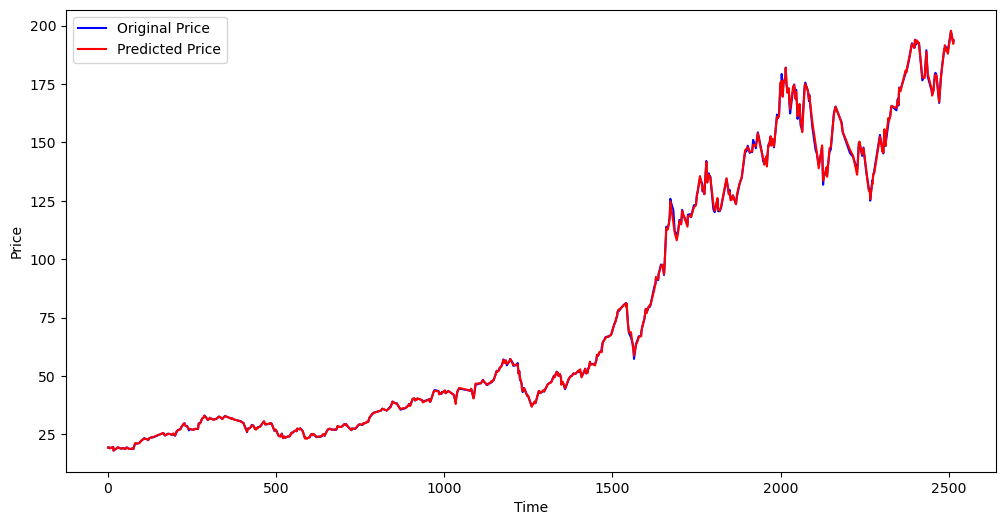

In [68]:
plt.figure(figsize=(12,6))
plt.plot(snew['Actual Values'],'b',label='Original Price')
plt.plot(snew['Predicted Values'],'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()